# Лабораторная работа 2-3 Лисин РТ5-61Б

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style="ticks")

In [3]:
data = pd.read_csv('moves.csv', sep = ",")

Данные датасета:
1. Имя (Name)
2. Тип (Type)
3. Категория (Cat.)
4. Сила (Power)
5. Точность (Acc.)
6. Очки силы (сколько требуется потратить на способность)
7. CD прокачки техники (TM)
8. Эффект (Effect)
9. Вероятность действия (Prob. (%))

In [4]:
data.isnull().sum()

Name           0
Type           0
Cat.           0
Power        259
Acc.         160
PP             1
TM           506
Effect        32
Prob. (%)    468
dtype: int64

In [5]:
data.shape

(607, 9)

In [6]:
data.dtypes

Name          object
Type          object
Cat.          object
Power        float64
Acc.          object
PP           float64
TM            object
Effect        object
Prob. (%)    float64
dtype: object

In [7]:
data.head()

,Name,Type,Cat.,Power,Acc.,PP,TM,Effect,Prob. (%)
0,Absorb,GRASS,Special,20.0,100,25.0,NaN,User recovers half the HP inflicted on opponent.,NaN
1,Acid,POISON,Special,40.0,100,30.0,NaN,May lower opponent's Special Defense.,10.0
2,Acid Armor,POISON,Status,NaN,NaN,40.0,NaN,Sharply raises user's Defense.,NaN
3,Acid Spray,POISON,Special,40.0,100,20.0,NaN,Sharply lowers opponent's Special Defense.,100.0
4,Acrobatics,FLYING,Physical,55.0,100,15.0,TM62,Stronger when the user does not have a held item.,NaN


In [8]:
data.isnull().sum()

Name           0
Type           0
Cat.           0
Power        259
Acc.         160
PP             1
TM           506
Effect        32
Prob. (%)    468
dtype: int64

## Преобразуем датасет к рабочему виду

In [9]:
#Логично, что если в таблице нет данных о точности способности, значит она работает гарантированно
data['Acc.'][data['Acc.'].isnull()] = 100
#Аналогично с вероятностью действия способности
data['Prob. (%)'][data['Prob. (%)'].isnull()] = 100
#Также логично, что если в таблице нет данных о силе способности, то она не наносит урон, а значит равна нулю
data['Power'][data['Power'].isnull()] = 0

<ipython-input-9-fed872aca1b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Acc.'][data['Acc.'].isnull()] = 100
<ipython-input-9-fed872aca1b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prob. (%)'][data['Prob. (%)'].isnull()] = 100
<ipython-input-9-fed872aca1b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Power'][data['Power'].isnull()] = 0


In [10]:
data.shape

(607, 9)

In [11]:
#Почему то в некоторых строках значение "точности" равнялось бесконечности, что не имеет никакого смысла.
for i in range(len(data['Acc.'])):
    if(data['Acc.'][i] == '∞'):
        data['Acc.'][i] = 100

<ipython-input-11-a6b7b03823ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Acc.'][i] = 100


In [12]:
data.isnull().sum()

Name           0
Type           0
Cat.           0
Power          0
Acc.           0
PP             1
TM           506
Effect        32
Prob. (%)      0
dtype: int64

In [13]:
data['Acc.'] = data['Acc.'].astype(str).astype(int)

In [14]:
data[data['PP'].isnull()].head()

,Name,Type,Cat.,Power,Acc.,PP,TM,Effect,Prob. (%)
516,Struggle,NORMAL,Physical,50.0,100,NaN,NaN,Only usable when all PP are gone. Hurts the user.,100.0


In [15]:
#Единственное пустое значение для PP у способности, которая работает, когда значение PP кончилось
#Мы могли бы сделать его значение равно нулю, но это неправильно, потому что способность вместо этого тратит хп
#и поэтому она будет портить статистику, легче будет просто ее удалить
data = data.drop(516, 0)

In [16]:
data.isnull().sum()

Name           0
Type           0
Cat.           0
Power          0
Acc.           0
PP             0
TM           505
Effect        32
Prob. (%)      0
dtype: int64

In [17]:
#ТМ имеет слишком много пропусков и не имеет значения, поэтому можем спокойно его удалить
#Также удалим Effect потому что это описания и после этого этапа они аткже не нужны
data = data.dropna(axis=1, how='any')

In [18]:
#Столбец Name так же не имеет значения, поэтому удалим его
data = data.drop('Name', 1)

In [19]:
data.isnull().sum()

Type         0
Cat.         0
Power        0
Acc.         0
PP           0
Prob. (%)    0
dtype: int64

In [20]:
data['PP'] = data['PP'].astype(int)
data['Power'] = data['Power'].astype(int)
data['Prob. (%)'] = data['Prob. (%)'].astype(int)

In [21]:
data.dtypes

Type         object
Cat.         object
Power         int64
Acc.          int64
PP            int64
Prob. (%)     int64
dtype: object

## Кодирование категориальных признаков

In [22]:
data = pd.get_dummies(data)

In [23]:
data.head()

,Power,Acc.,PP,Prob. (%),Type_BUG,Type_DARK,Type_DRAGON,Type_ELECTRIC,Type_FAIRY,Type_FIGHTING,...,Type_ICE,Type_NORMAL,Type_POISON,Type_PSYCHIC,Type_ROCK,Type_STEEL,Type_WATER,Cat._Physical,Cat._Special,Cat._Status
0,20,100,25,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40,100,30,10,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,100,40,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,40,100,20,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,55,100,15,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Масштабирование данных

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [25]:
data_unscaled = data.copy()

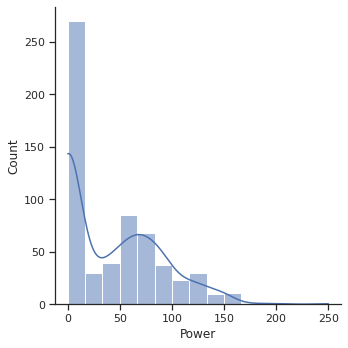

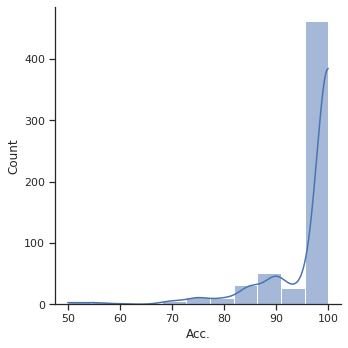

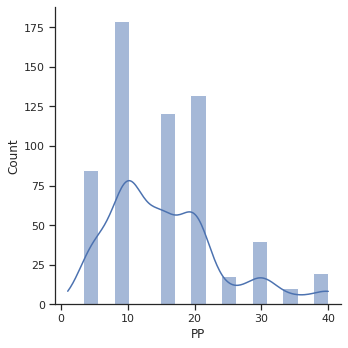

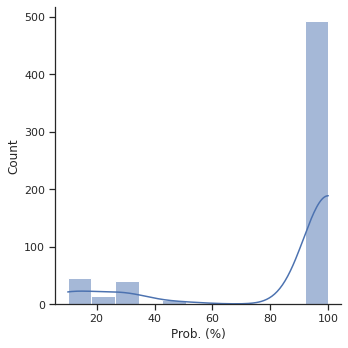

In [26]:
sns.displot(data=data, x="Power", kde = True)
sns.displot(data=data, x="Acc.", kde = True)
sns.displot(data=data, x="PP", kde = True)
sns.displot(data=data, x="Prob. (%)", kde = True)

График Power соответствует нормальному распределению, за исключением перекоса на нулевом значении, поэтому применим MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()
Power = mms.fit_transform(data[['Power']])
data["Power"] = Power

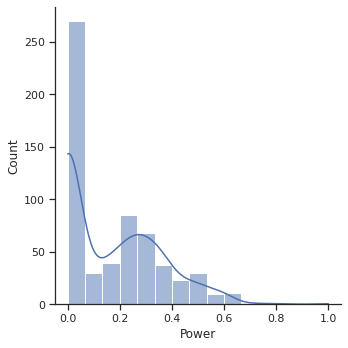

In [28]:
sns.displot(data=data, x="Power", kde = True)

Рассмотрим Acc.

<AxesSubplot:xlabel='Acc.'>

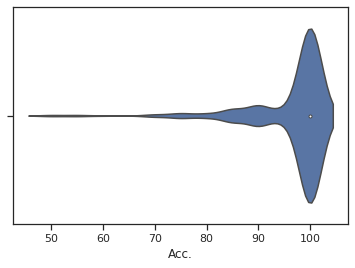

In [29]:
sns.violinplot(data=data, x="Acc.", kde = True)

Видим "хвост", поэтому используем Z-оценку

In [30]:
ss = StandardScaler()
Accuracy = ss.fit_transform(data[['Acc.']])
data["Acc."] = Accuracy

<AxesSubplot:xlabel='Acc.'>

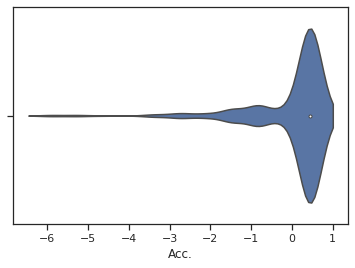

In [31]:
sns.violinplot(data=data, x="Acc.", kde = True)

График PP соответствует нормальному распределению, поэтому применим MinMaxScaler

In [32]:
mms = MinMaxScaler()
PP = mms.fit_transform(data[['PP']])
data["PP"] = PP

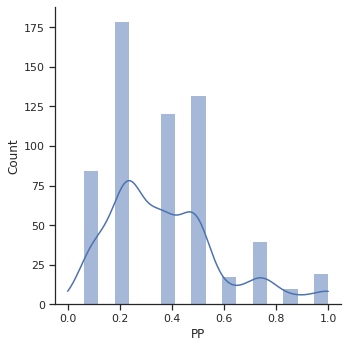

In [33]:
sns.displot(data=data, x="PP", kde = True)

<AxesSubplot:xlabel='Prob. (%)'>

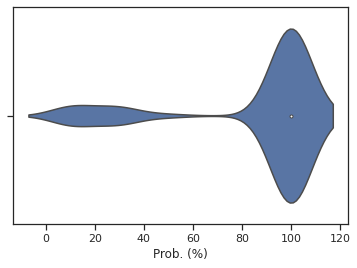

In [34]:
sns.violinplot(data=data, x="Prob. (%)", kde = True)

Нормального распределения не наблюдается, используем Z-оценку

In [35]:
ss = StandardScaler()
Probability = ss.fit_transform(data[['Prob. (%)']])
data["Prob. (%)"] = Probability

<AxesSubplot:xlabel='Prob. (%)'>

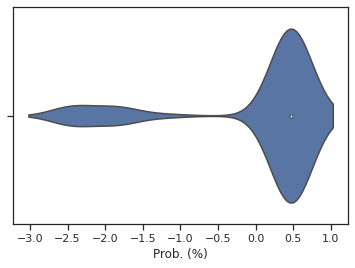

In [36]:
sns.violinplot(data=data, x="Prob. (%)", kde = True)

Итоговый вид набора данных

In [37]:
data.head()

,Power,Acc.,PP,Prob. (%),Type_BUG,Type_DARK,Type_DRAGON,Type_ELECTRIC,Type_FAIRY,Type_FIGHTING,...,Type_ICE,Type_NORMAL,Type_POISON,Type_PSYCHIC,Type_ROCK,Type_STEEL,Type_WATER,Cat._Physical,Cat._Special,Cat._Status
0,0.08,0.44533,0.615385,0.470806,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.16,0.44533,0.743590,-2.464131,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.00,0.44533,1.000000,0.470806,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.16,0.44533,0.487179,0.470806,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.22,0.44533,0.358974,0.470806,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
data_scaled = data.copy()

# ЛР3

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split

In [40]:
columns = data_scaled.columns.tolist()
column = columns.pop(columns.index("PP"))
columns.append(column)

data_scaled = data_scaled[columns]

In [41]:
data_scaled.head()

,Power,Acc.,Prob. (%),Type_BUG,Type_DARK,Type_DRAGON,Type_ELECTRIC,Type_FAIRY,Type_FIGHTING,Type_FIRE,...,Type_NORMAL,Type_POISON,Type_PSYCHIC,Type_ROCK,Type_STEEL,Type_WATER,Cat._Physical,Cat._Special,Cat._Status,PP
0,0.08,0.44533,0.470806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.615385
1,0.16,0.44533,-2.464131,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.743590
2,0.00,0.44533,0.470806,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1.000000
3,0.16,0.44533,0.470806,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.487179
4,0.22,0.44533,0.470806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.358974


<AxesSubplot:ylabel='Density'>

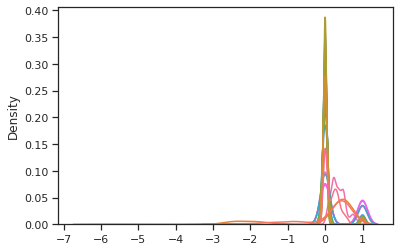

In [42]:
sns.kdeplot(data = data_scaled, legend = False)

## Разделим выборку

In [43]:
y_column = "PP"
x_columns = data_scaled.columns.tolist()
x_columns.pop(x_columns.index(y_column))

data_scaled_x_train, data_scaled_x_test, data_scaled_y_train, data_scaled_y_test = train_test_split(data_scaled[x_columns], data_scaled[y_column], test_size = 0.8, random_state = 15)

In [44]:
from sklearn.neighbors import KNeighborsRegressor


knn_scaled = KNeighborsRegressor(n_neighbors = 15)

knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)

knn_scaled_prediction = knn_scaled.predict(data_scaled_x_test)

## Обучим модель для произвольного гиперпараметра

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_validate


print('Средняя абсолютная ошибка:',   mean_absolute_error(data_scaled_y_test, knn_scaled_prediction))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_scaled_y_test, knn_scaled_prediction))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_scaled_y_test, knn_scaled_prediction, squared = False))
print('Коэффициент детерминации:',   r2_score(data_scaled_y_test, knn_scaled_prediction))

Средняя абсолютная ошибка: 0.16896642876024318
Медианная абсолютная ошибка: 0.12820512820512825
Среднеквадратичная ошибка: 0.22033331013001045
Коэффициент детерминации: 0.005385464252665173


## Подбор гиперпараметров

## GridSearch через квадратичную ошибку

In [47]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 51, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(data_scaled_x_train, data_scaled_y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}],
             scoring='neg_mean_squared_error')

In [48]:
print('Лучшая модель:', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:',gs.best_score_)

Лучшая модель: KNeighborsRegressor(n_neighbors=11)

Лучшее число ближайших соседей: {'n_neighbors': 11}

Лучшее значение средней квадратичной ошибки: -0.03849163209034105


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



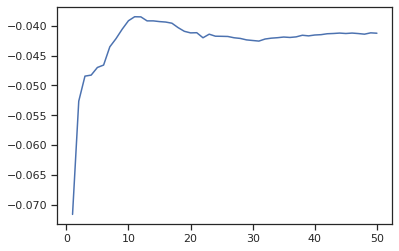

In [49]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель: KNeighborsRegressor(n_neighbors=11)

Лучшее число ближайших соседей: {'n_neighbors': 11}

Лучшее значение коэффициента детерминации: -0.0709306186626206

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



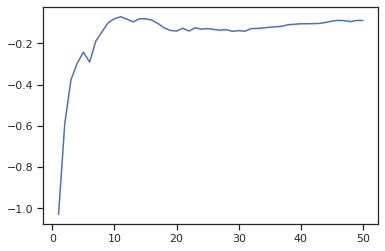

In [50]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(data_scaled_x_train, data_scaled_y_train)
print('Лучшая модель:', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsRegressor(n_neighbors = 11), 
                                       data_scaled[x_columns], data_scaled[y_column], 
                                       scoring = "r2", 
                                       cv = ShuffleSplit(n_splits = 8, 
                                                         test_size = 0.8, 
                                                         random_state = 11))

In [52]:
print('Усредненное значение коэффицента детерминации для оптимальной модели: ', np.mean(scores)) 

Усредненное значение коэффицента детерминации для оптимальной модели:  0.035944788846929754


Коэффицент детерминации стал меньше, но все еще больше нуля